In [1]:
# MAIN PROCEDURES IN THIS NOTEBOOK:

# import dataframe
# split to home and away dfs with game id in both
# create lag (EMA) features
# re-join dataframes

In [22]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_columns', 50)

In [70]:
df = pd.read_pickle('ACTUAL_MASTER_0419.pkl')

In [5]:
df.head()

,game_id,home_team,away_team,week,season,home_score,away_score,outcome,spread,total,fav_odds,dog_odds,day/month,time_of_day,month,day,time_day_bin,home_rank,home_wins_into_week,home_losses_into_week,away_rank,away_wins_into_week,away_losses_into_week,home_advantage,game_url
0,2009091304,CLE,MIN,1,2009,20,34,0.0,-4.0,40.0,-220,190.0,9/13,1.00,9,13,Day,28,4,12,9,10,6,19,http://www.nfl.com/liveupdate/game-center/2009...
1,2009091308,TB,DAL,1,2009,21,34,0.0,-5.5,40.0,-260,215.0,9/13,1.00,9,13,Day,26,9,7,17,9,7,9,http://www.nfl.com/liveupdate/game-center/2009...
2,2009091302,CAR,PHI,1,2009,10,38,0.0,-2.5,43.5,-145,125.0,9/13,1.00,9,13,Day,14,12,4,4,9,6,10,http://www.nfl.com/liveupdate/game-center/2009...
3,2009091401,OAK,LAC,1,2009,20,24,0.0,-10.5,43.0,-600,450.0,9/14,10.15,9,14,Night,30,5,11,5,8,8,25,http://www.nfl.com/liveupdate/game-center/2009...
4,2009092001,DET,MIN,2,2009,13,27,0.0,-10.0,45.5,-500,400.0,9/20,1.00,9,20,Day,31,0,1,8,1,0,23,http://www.nfl.com/liveupdate/game-center/2009...


In [71]:
# create a few more columns
df['home_pt_diff'] = df.home_score - df.away_score
df['away_pt_diff'] = df.away_score - df.home_score
df['away_rank_diff'] = df.away_rank - df.home_rank

In [8]:
df.columns

Index(['game_id', 'home_team', 'away_team', 'week', 'season', 'home_score',
       'away_score', 'outcome', 'spread', 'total', 'fav_odds', 'dog_odds',
       'day/month', 'time_of_day', 'month', 'day', 'time_day_bin', 'home_rank',
       'home_wins_into_week', 'home_losses_into_week', 'away_rank',
       'away_wins_into_week', 'away_losses_into_week', 'home_advantage',
       'game_url', 'home_pt_diff', 'away_pt_diff'],
      dtype='object')

In [72]:
# split master DF into two DFs. One with all home team info, and the other with away team info.
# The purpose of this is to get the home and away info on seperate rows (easier to create EMAs)
home_df = df[['game_id', 'home_team', 'week', 'season', 'home_score',
             'home_pt_diff','outcome', 'spread', 'total', 'fav_odds',
              'dog_odds', 'home_rank','home_advantage']]

In [73]:
away_df = df[['game_id', 'away_team', 'week', 'season', 'away_score',
             'away_pt_diff','outcome', 'spread', 'total', 'fav_odds',
              'dog_odds', 'away_rank','away_rank_diff']]

In [67]:
home_df.head()

,game_id,home_team,week,season,home_score,home_pt_diff,outcome,spread,total,fav_odds,dog_odds,home_rank,home_advantage
0,2009091304,CLE,1,2009,20,-14,0.0,-4.0,40.0,-220,190.0,28,19
1,2009091308,TB,1,2009,21,-13,0.0,-5.5,40.0,-260,215.0,26,9
2,2009091302,CAR,1,2009,10,-28,0.0,-2.5,43.5,-145,125.0,14,10
3,2009091401,OAK,1,2009,20,-4,0.0,-10.5,43.0,-600,450.0,30,25
4,2009092001,DET,2,2009,13,-14,0.0,-10.0,45.5,-500,400.0,31,23


In [79]:
home_df['home_team_01'] = 1
away_df['home_team_01'] = 0

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [80]:
home_df.head()

,game_id,home_team,week,season,home_score,home_pt_diff,outcome,spread,total,fav_odds,dog_odds,home_rank,home_advantage,home_team_01
0,2009091304,CLE,1,2009,20,-14,0.0,-4.0,40.0,-220,190.0,28,19,1
1,2009091308,TB,1,2009,21,-13,0.0,-5.5,40.0,-260,215.0,26,9,1
2,2009091302,CAR,1,2009,10,-28,0.0,-2.5,43.5,-145,125.0,14,10,1
3,2009091401,OAK,1,2009,20,-4,0.0,-10.5,43.0,-600,450.0,30,25,1
4,2009092001,DET,2,2009,13,-14,0.0,-10.0,45.5,-500,400.0,31,23,1


In [81]:
away_df.head()

,game_id,away_team,week,season,away_score,away_pt_diff,outcome,spread,total,fav_odds,dog_odds,away_rank,away_rank_diff,home_team_01
0,2009091304,MIN,1,2009,34,14,0.0,-4.0,40.0,-220,190.0,9,-19,0
1,2009091308,DAL,1,2009,34,13,0.0,-5.5,40.0,-260,215.0,17,-9,0
2,2009091302,PHI,1,2009,38,28,0.0,-2.5,43.5,-145,125.0,4,-10,0
3,2009091401,LAC,1,2009,24,4,0.0,-10.5,43.0,-600,450.0,5,-25,0
4,2009092001,MIN,2,2009,27,14,0.0,-10.0,45.5,-500,400.0,8,-23,0


In [82]:
# sort values chronologically

home_df = home_df.sort_values(['season', 'home_team', 'week'])
away_df = away_df.sort_values(['season', 'away_team', 'week'])

In [83]:
# Rename some columns

home_df.rename(columns={'home_team':'team', 'home_score':'score', 'home_pt_diff':'pt_diff',
                       'home_rank':'rank', 'home_wins_into_week':'wins_into_week',
                       'home_losses_into_week':'losses_into_week', 'home_advantage': 'rank_diff', 
                       'home_team_01':'home_team'}, inplace=True)

away_df.rename(columns={'away_team':'team', 'away_score':'score', 'away_pt_diff':'pt_diff',
                       'away_rank':'rank', 'away_wins_into_week':'wins_into_week',
                       'away_losses_into_week':'losses_into_week', 'away_rank_diff': 'rank_diff',
                       'home_team_01':'home_team'}, inplace=True)

In [84]:
# Concat DFs so home & away data is on different rows
team_stats = pd.concat([home_df, away_df])
team_stats = team_stats.sort_values(['season', 'team', 'week'])

In [85]:
team_stats.head(20)

,game_id,team,week,season,score,pt_diff,outcome,spread,total,fav_odds,dog_odds,rank,rank_diff,home_team
624,2009091309,ARI,1,2009,16,-4,0.0,-5.0,46.0,-230,190.0,13,-9,1
633,2009092003,ARI,2,2009,31,14,0.0,-3.0,44.0,-165,145.0,17,-8,0
647,2009092714,ARI,3,2009,10,-21,0.0,-3.0,49.5,-160,140.0,18,15,1
665,2009101109,ARI,5,2009,28,7,1.0,-6.0,50.5,-250,210.0,19,-1,1
673,2009101809,ARI,6,2009,27,24,0.0,-3.0,45.5,-150,130.0,19,-1,0
682,2009102511,ARI,7,2009,24,7,0.0,-8.0,47.0,-350,290.0,16,11,0
691,2009110110,ARI,8,2009,21,-13,0.0,-10.0,43.5,-500,400.0,10,-14,1
695,2009110801,ARI,9,2009,41,20,0.0,-2.0,45.0,-135,115.0,13,-4,0
711,2009111509,ARI,10,2009,31,11,1.0,-8.5,46.5,-360,290.0,10,-15,1
49,2009112209,ARI,11,2009,21,8,0.0,-9.0,47.0,-400,325.0,7,-23,0


In [198]:
# CREATE EMA FEATURES

# Create a copy of the DataFrame
ema_features = team_stats[['game_id', 'team', 'home_team']].copy()

# get the columns that we want to create EMAs for
feature_names = team_stats.drop(columns=['game_id', 'team', 'home_team']).columns

# loop over features and create EMAs
for feature_name in feature_names:
    feature_ema = (team_stats.groupby('team')[feature_name] # Calculate the EMA
                                                  .transform(lambda row: row.ewm(span=20, min_periods=4)
                                                             .mean()
                                                             .shift(1))) # Shift the data down 1 so we don't leak data
    ema_features[feature_name] = feature_ema # Add the new feature to the DataFrame
    

In [188]:
ema_features.head()

,game_id,team,home_team,score,pt_diff,spread,total,fav_odds,dog_odds,rank,rank_diff
624,2009091309,ARI,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
633,2009092003,ARI,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
647,2009092714,ARI,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
665,2009101109,ARI,1,18.780183,-4.262281,-3.601166,46.620733,-182.701915,156.690258,16.164863,0.144879
673,2009101809,ARI,0,21.441802,-1.011035,-4.293672,47.740617,-202.129832,172.079956,16.983323,-0.185630


In [199]:
ema_features = ema_features.drop(['week', 'season','outcome'], axis=1)

In [200]:
home_check = ema_features.loc[team_stats.home_team == 1]

In [201]:
home_check['outcome'] = home_df.outcome

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [191]:
home_check.head()

,game_id,team,home_team,score,pt_diff,spread,total,fav_odds,dog_odds,rank,rank_diff,outcome
624,2009091309,ARI,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
647,2009092714,ARI,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
665,2009101109,ARI,1,18.780183,-4.262281,-3.601166,46.620733,-182.701915,156.690258,16.164863,0.144879,1.0
691,2009110110,ARI,1,23.042322,5.452620,-4.828623,47.156729,-223.374004,188.924174,17.160797,2.018594,0.0
711,2009111509,ARI,1,25.826992,5.081353,-5.148447,46.212042,-251.360384,209.156715,15.321686,-1.526941,1.0


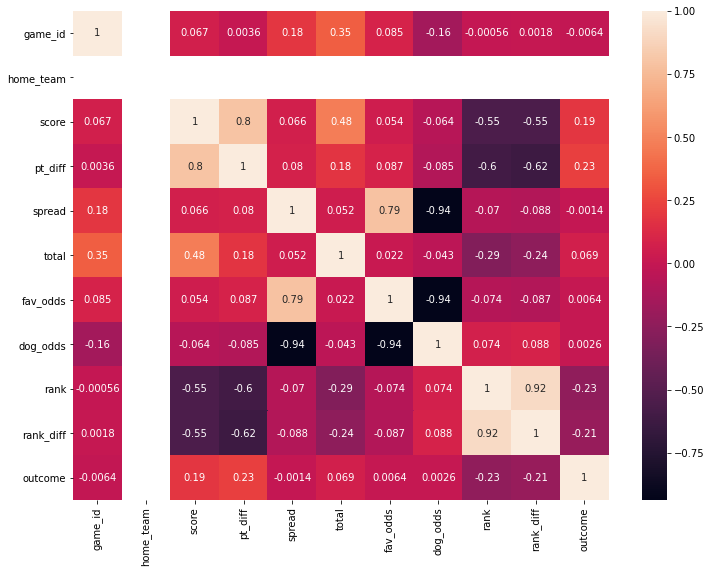

In [202]:
#Experiment with various Span values. 
# 20 seemed to provide the highest EMA correlations with target.

#span = 20, min 4
plt.figure(figsize=(12,9))
sns.heatmap(home_check.corr(), annot=True)

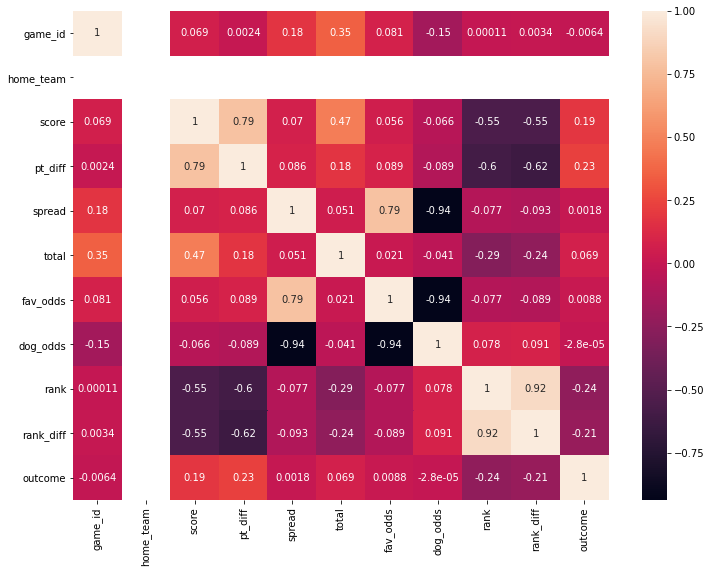

In [115]:
#span = 5
plt.figure(figsize=(12,9))
sns.heatmap(home_check.corr(), annot=True)

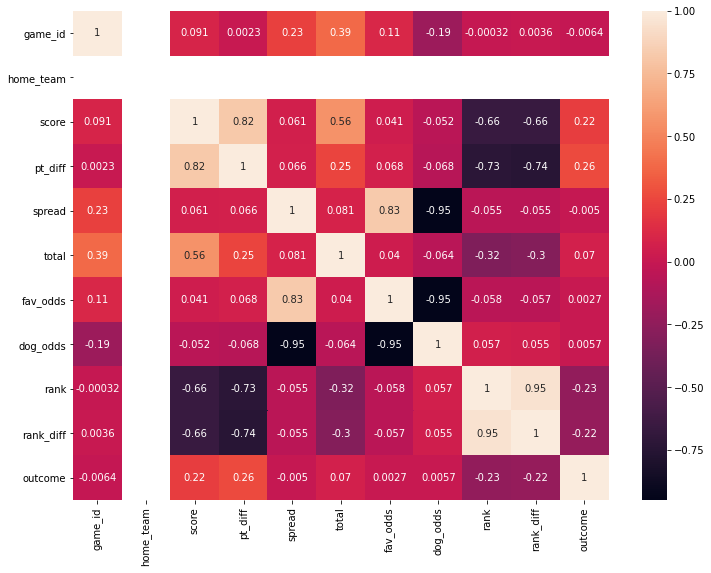

In [120]:
#span = 10
plt.figure(figsize=(12,9))
sns.heatmap(home_check.corr(), annot=True)

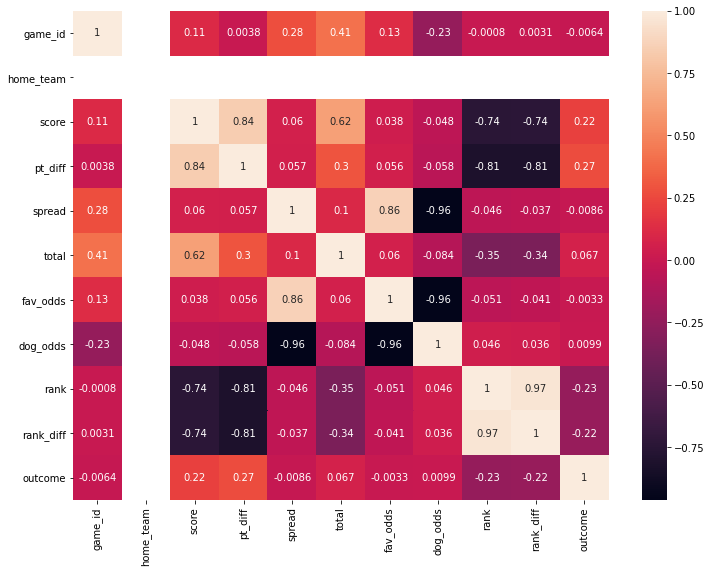

In [131]:
#span = 20
plt.figure(figsize=(12,9))
sns.heatmap(home_check.corr(), annot=True)

In [164]:
# DROP UNCORRELATED FEATURES
good_emas = ema_features.drop(['week', 'season', 'outcome',
                               'spread','fav_odds', 'dog_odds'], axis=1)

In [167]:
# DIVIDE DF AGAIN TO RE_CREATE THE TWO HOME AND AWAY DATEFRAMES

good_emas_home = good_emas.loc[good_emas.home_team == 1]
good_emas_away = good_emas.loc[good_emas.home_team == 0]

In [168]:
good_emas_home.columns

Index(['game_id', 'team', 'home_team', 'score', 'pt_diff', 'total', 'rank',
       'rank_diff'],
      dtype='object')

In [177]:
# RENAME COLUMNS FOR MERGE

good_emas_home = good_emas_home.rename(columns={'score':'home_score_EMA', 'pt_diff':'home_pt_diff_EMA',
                              'total':'home_total_EMA', 'rank':'home_rank_EMA', 
                              'rank_diff':'home_rank_diff_EMA'})

good_emas_away = good_emas_away.rename(columns={'score':'away_score_EMA', 'pt_diff':'away_pt_diff_EMA',
                              'total':'away_total_EMA', 'rank':'away_rank_EMA', 
                              'rank_diff':'away_rank_diff_EMA'})

In [ ]:
# MERGE NEWLY CREATED INFORMATION WITH PREVIOUS MASTER DATAFRAME

In [178]:
test = good_emas_home.merge(good_emas_away, on='game_id')
test.rename(columns={'team_x':'home_team', 'team_y':'away_team'}, inplace=True)

test.drop(['home_team_x','home_team_y'], axis=1, inplace=True)
test.dropna(inplace=True)

In [184]:
#test.to_pickle('GOOD_EMAS.pkl')

In [207]:
# MERGE with ORIG_DF on GAME ID
orig_df = pd.read_pickle('ACTUAL_MASTER_0419.pkl')

# Final DF for modeling:
new = orig_df.merge(test, on=['game_id', 'home_team', 'away_team'])

In [208]:
new.head()

,game_id,home_team,away_team,week,season,home_score,away_score,outcome,spread,total,fav_odds,dog_odds,day/month,time_of_day,month,day,time_day_bin,home_rank,home_wins_into_week,home_losses_into_week,away_rank,away_wins_into_week,away_losses_into_week,home_advantage,game_url,home_score_EMA,home_pt_diff_EMA,home_total_EMA,home_rank_EMA,home_rank_diff_EMA,away_score_EMA,away_pt_diff_EMA,away_total_EMA,away_rank_EMA,away_rank_diff_EMA
0,2009092702,DET,WAS,3,2009,19,14,1.0,-6.0,39.0,-260,220.0,9/27,1.00,9,27,Day,31,0,2,23,1,1,8,http://www.nfl.com/liveupdate/game-center/2009...,19.650,-15.900,47.6375,31.475,18.725,12.800,-1.800,37.0000,20.000,1.775
1,2009092708,TB,NYG,3,2009,0,24,0.0,-6.5,46.0,-270,230.0,9/27,1.00,9,27,Day,28,0,2,2,2,0,26,http://www.nfl.com/liveupdate/game-center/2009...,20.475,-13.000,41.0500,27.575,8.475,28.250,3.900,41.2000,3.000,-13.325
2,2009092707,LA,GB,3,2009,17,36,0.0,-6.5,42.5,-280,240.0,9/27,1.00,9,27,Day,32,0,2,12,1,1,20,http://www.nfl.com/liveupdate/game-center/2009...,3.675,-14.350,38.9000,31.525,13.900,22.575,-0.825,44.3750,11.475,-7.400
3,2009092709,BUF,NO,3,2009,7,27,0.0,-6.0,51.0,-265,225.0,9/27,4.05,9,27,Afternoon,21,1,1,7,2,0,14,http://www.nfl.com/liveupdate/game-center/2009...,28.725,6.350,44.6125,21.000,4.825,46.575,22.200,47.9000,14.850,-2.450
4,2009092710,SEA,CHI,3,2009,19,25,0.0,-3.0,37.5,-155,135.0,9/27,4.05,9,27,Afternoon,22,1,1,14,1,1,8,http://www.nfl.com/liveupdate/game-center/2009...,18.550,6.475,40.2125,14.475,-9.700,16.050,-1.275,42.5375,13.100,6.875
